In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = make_moons(n_samples=500, noise=0.1, random_state=1)

In [3]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


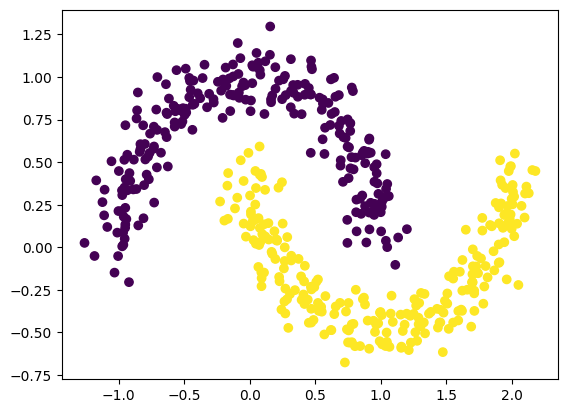

In [4]:
plt.scatter(X.T[0], X.T[1], c=Y)

- initialize parameters
- linear forward
- activation forward
- calculate cost
- backpropagation
- update parameters
- predict

In [5]:
def initialize_parameters(n_x, n_h, n_y):
  # 2, 4, 1
  W1 = np.random.randn(n_h, n_x) # nlayers, input
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y, n_h)
  b2 = np.zeros((n_y, 1))

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}

  return parameters

In [6]:
initialize_parameters(2,4,1)

{'W1': array([[ 0.77282886, -0.14251611],
        [-1.60600848, -1.45289855],
        [ 0.65341943, -1.09028168],
        [-0.30997978,  1.36954164]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.14459993, -0.91372942, -0.1698736 , -0.12898615]]),
 'b2': array([[0.]])}

In [7]:
def forward_propagation(parameters, X):
  W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

  Z1 = np.dot(W1, X) + b1 # W1-> (l, nx) X-> (nx, m)
  A1 = 1 / (1 + np.exp(-Z1))
  Z2 = np.dot(W2, A1) + b2
  A2 = 1 / (1 + np.exp(-Z2))

  cache = {"Z1": Z1,
           "A1": A1,
           "Z2": Z2,
           "A2": A2}
  return A2, cache

In [8]:
params = initialize_parameters(2, 4, 1)
yh, chache = forward_propagation(params, X.T)


In [16]:
def compute_cost(Yh, Y):
  m = Y.shape[1]
  cost = -np.sum((Y * np.log(Yh)) + ((1-Y) * np.log(1-Yh))) / m

  return cost

In [17]:
compute_cost(yh, np.array([Y[:]]))

np.float64(1.2992603242572278)

In [24]:
def backpropagation(parameters, cache, X, Y):
  W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

  A2, A1, Z1, Z2 = cache["A2"], cache["A1"], cache["Z1"], cache["Z2"]

  m = Y.shape[1]
  dZ2 =  A2 - Y
  dW2 = np.dot(dZ2, A1.T) / m
  db2 = np.sum(dZ2, axis=1, keepdims=True) / m
  dA1 = A1 * (1-A1)
  dZ1 = (W2.T*dZ2) * dA1
  dW1 = np.dot(dZ1,X.T) / m
  db1 = np.sum(dZ1, axis=1, keepdims=True) / m

  grads = {"dW1": dW1,
           "db1": db1,
           "dW2": dW2,
           "db2": db2}
  return grads

In [27]:
grads = backpropagation(params, chache, X.T,  np.array([Y[:]]))
grads

{'dW1': array([[ 0.00715083, -0.00562245],
        [ 0.06176743, -0.04531129],
        [ 0.11429309, -0.03967475],
        [-0.03685644,  0.02236313]]),
 'db1': array([[ 0.00489966],
        [ 0.05993471],
        [ 0.07730316],
        [-0.02342737]]),
 'dW2': array([[-0.24711383, -0.3187064 , -0.155058  , -0.2170621 ]]),
 'db2': array([[-0.26587545]])}

In [29]:
def update_parameters(parameters, grads, learning_rate=1.2):
  W1, b1, W2, b2 = parameters["W1"], parameters["b1"], parameters["W2"], parameters["b2"]

  dW1, db1, dW2, db2 = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]

  W1 = W1 - (dW1*learning_rate)
  b1 = b1 - (db1*learning_rate)
  W2 = W2 - (dW2*learning_rate)
  b2 = b2 - (db2*learning_rate)

  parameters = {"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}
  return parameters

In [30]:
update_parameters(params, grads)

{'W1': array([[ 1.72187344,  0.69958876],
        [ 1.53345981, -1.77839904],
        [-0.60588093, -1.72492552],
        [ 1.2690571 ,  0.72870976]]),
 'b1': array([[-0.0058796 ],
        [-0.07192165],
        [-0.09276379],
        [ 0.02811284]]),
 'W2': array([[ 0.136657  , -1.87588669, -0.91937821,  0.81799223]]),
 'b2': array([[0.31905055]])}

In [102]:
def nn_model(X, Y, n_h, iterations=10000):

  n_x, n_y = X.shape[0], Y.shape[0]
  params = initialize_parameters(n_x, n_h, n_y)

  for i in range(iterations):
    yh, cache = forward_propagation(params, X)
    if i % 50 == 0:
      plot_decision_boundry(params, X.T, yh, f"images/{i}")
    cost = compute_cost(yh, Y)
    grads = backpropagation(params, cache, X, Y)
    params = update_parameters(params, grads)

    if i % 1000 == 0:
      print(f"Cost at {i} iteration: {cost}")

  return params

In [38]:
def predict(parameters, X):
  yh, _ = forward_propagation(parameters, X)
  yh = yh > 0.5

  return yh

In [104]:
params = nn_model(X.T, np.array([Y[:]]), 4, 6000)

(500, 2)
(10000, 2)
Cost at 0 iteration: 1.102885192412906
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
Cost at 1000 iteration: 0.2155549126997303
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
Cost at 2000 iteration: 0.09271916494347464
(500, 2)
(10000, 2)
(500, 2)
(10000, 2)
(500, 2)
(1000

In [105]:
import imageio

In [108]:
with imageio.get_writer('decision_boundary_evolution.gif', mode='I', duration=0.1) as writer:
    for i in range(0, 6000, 50):
        image = imageio.imread(f"/content/images/{i}.png")
        writer.append_data(image)

/tmp/ipython-input-3130304419.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(f"/content/images/{i}.png")


In [80]:
yh = predict(params, X.T)
yh[:40]

array([[ True,  True, False, False,  True,  True,  True, False, False,
        False,  True, False, False, False,  True, False,  True,  True,
        False, False,  True,  True,  True,  True, False,  True, False,
         True, False, False, False,  True, False,  True,  True, False,
         True, False,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True,  True, False, False, False, False,  True,
         True, False,  True,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True, False,  True,  True,
        False, False, False,  True,  True,  True,  True, False,  True,
        False, False,  True, False, False,  True,  True,  True,  True,
         True,  True,  True, False,  True, False, False, False, False,
        False, False,  True,  True, False,  True, False,  True, False,
        False, False,  True,  True,  True,  True,  True, False,  True,
        False, False,  True,  True, False, False,  True, False,  True,
      

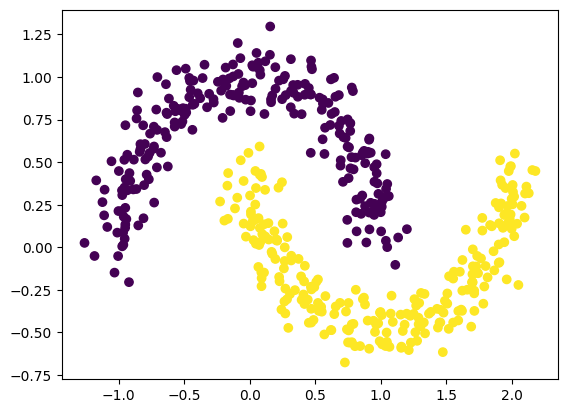

In [81]:
plt.scatter(X.T[0], X.T[1], c=yh)

(10000, 2)


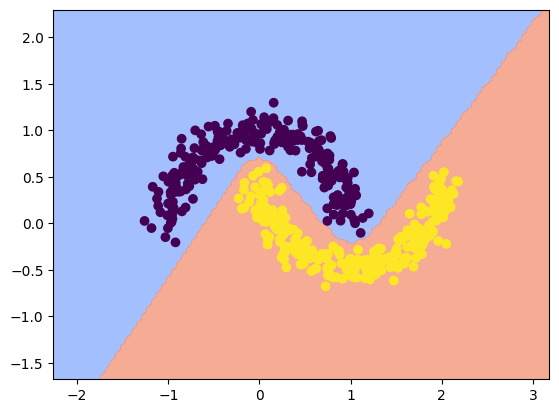

In [83]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

print(np.c_[xx.ravel(), yy.ravel()].shape)
# Step 4: Predict the class for each point in the mesh grid
Z = predict(params, np.c_[xx.ravel(), yy.ravel()].T)
Z = Z.reshape(xx.shape)

# # Step 5: Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X.T[0], X.T[1], c=yh)

In [96]:
def plot_decision_boundry(parameters, X, Y, filename):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                      np.linspace(y_min, y_max, 100))
  print(X.shape)
  print(np.c_[xx.ravel(), yy.ravel()].shape)
  # Step 4: Predict the class for each point in the mesh grid
  Z = predict(parameters, np.c_[xx.ravel(), yy.ravel()].T)
  Z = Z.reshape(xx.shape)

  # # Step 5: Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
  plt.scatter(X.T[0], X.T[1], c=Y)
  plt.savefig(filename)
  plt.close()

In [97]:
plot_decision_boundry(params, X, yh, "1")

(500, 2)
(10000, 2)


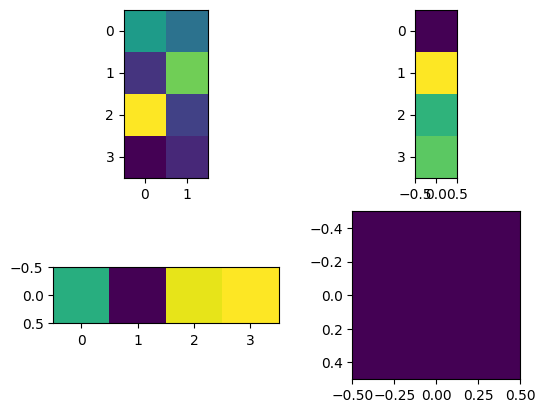

In [87]:
plt.subplot(2,2,1)
plt.imshow(params["W1"])
plt.subplot(2,2,2)
plt.imshow(params["b1"])
plt.subplot(2,2,3)
plt.imshow(params["W2"])
plt.subplot(2,2,4)
plt.imshow(params["b2"])
